# ANOVA and Chi Square 

## Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. 

### Assumptions of ANOVA

* 1) All populations involved follow a normal distribution
* 2) All populations have the same variance
* 3) The samples are randomly selected and independent of one another


## <u>One-way ANOVA</u>

### Example 1

Consider the monthly income of members from three different gyms - fitness centers given in file name gym.csv:

Using ANOVA, test whether the mean monthly income is equal for each Gym.


In [138]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn           as sns

In [139]:
# Set working Directory
os.chdir("D:\\SMDM\\")

# Load the Cardio Dataset
mydata = pd.read_csv('gym.csv')
mydata.head()
print(mydata)


    Gym  Monthly_inc
0     1           60
1     1           66
2     1           65
3     1           55
4     1           62
5     1           70
6     1           51
7     1           72
8     1           58
9     1           61
10    1           71
11    1           41
12    1           70
13    1           57
14    1           55
15    1           63
16    1           64
17    1           76
18    1           74
19    1           54
20    1           58
21    1           73
22    2           56
23    2           65
24    2           65
25    2           63
26    2           57
27    2           47
28    2           72
29    2           56
..  ...          ...
33    2           62
34    2           68
35    2           75
36    2           60
37    2           73
38    2           63
39    2           64
40    3           67
41    3           56
42    3           65
43    3           61
44    3           63
45    3           59
46    3           42
47    3           53
48    3      

In [140]:
# Convert Gym to Categorical Viraiable
print(mydata.dtypes)
mydata.Gym = pd.Categorical(mydata.Gym)
print(mydata.dtypes)

Gym            int64
Monthly_inc    int64
dtype: object
Gym            category
Monthly_inc       int64
dtype: object


In [141]:
print(mydata.groupby('Gym').describe())

    Monthly_inc                                                    
          count       mean       std   min    25%   50%   75%   max
Gym                                                                
1          22.0  62.545455  8.672492  41.0  57.25  62.5  70.0  76.0
2          18.0  63.277778  7.789930  47.0  57.75  63.5  67.5  75.0
3          23.0  60.826087  8.003705  42.0  56.50  62.0  66.0  73.0


### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

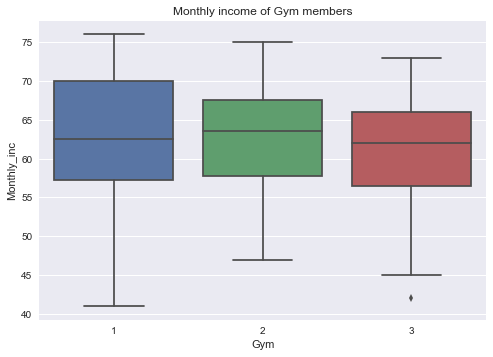

In [142]:
sns.boxplot(x = "Gym", y = "Monthly_inc", data = mydata)
plt.title('Monthly income of Gym members')
plt.show()

#### The boxplots show almost similar shapes, location and spreads and group 3 has an low outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [143]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Monthly_inc ~ Gym', data=mydata).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F   PR(>F)
Gym         66.614123   2.0  0.497075  0.61079
Residual  4020.370004  60.0       NaN      NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, p-value(=0.61079) is greater than alpha(0.05)Critical value of F( = 3.15)

So the statistical decision is not to reject the null hypothesis at 5% level of significance.

### So there is  not enough evidence  to reject the null hypothesis that at least one mean monthly income of a gym is different from others .

### Example 2

#### National Transportation Safety Board  (NTSB) examines the safety of compact cars, midsize cars and full-size cars. 

Using the fake data given below, test whether the mean pressure applied to the driver's head during a crash test is equal for each types of  car at 5% level of significance.

* mean_pressure_ compact_car    =  [643, 655,702]
* mean_pressure_ midsize_car    =  [469, 427, 525]
* mean_pressure_ fullsize_car   =  [484, 456, 402]

In [144]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [145]:
# Set working Directory
os.chdir("D:\\SMDM\\")

# Load the Cardio Dataset

cardata = pd.read_csv('car.csv')
cardata.head()

,Car_Type,Mean_Pressure
0,C,643
1,C,655
2,C,702
3,M,469
4,M,427


In [123]:
print(cardata.groupby('Car_Type').describe())

         Mean_Pressure                                                     \
                 count        mean        std    min    25%    50%    75%   
Car_Type                                                                    
C                  3.0  666.666667  31.182260  643.0  649.0  655.0  678.5   
F                  3.0  447.333333  41.681331  402.0  429.0  456.0  470.0   
M                  3.0  473.666667  49.166384  427.0  448.0  469.0  497.0   

                 
            max  
Car_Type         
C         702.0  
F         484.0  
M         525.0  


### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

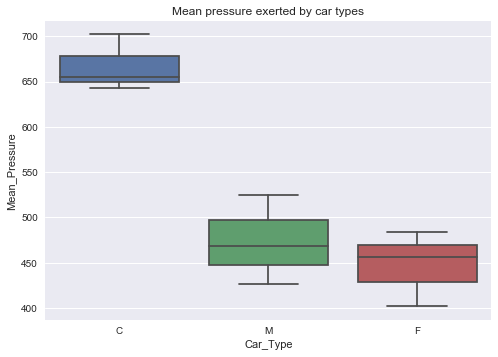

In [146]:
sns.boxplot(x = "Car_Type", y = "Mean_Pressure", data = cardata)
plt.title('Mean pressure exerted by car types')
plt.show()

#### The boxplots show almost dissimilar shapes, location and spreads and there is no outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean pressure applied to the driver's head during crash test by Compact car, Midsize car and Full size car respectively.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [147]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Mean_Pressure ~ Car_Type', data = cardata).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq   df          F    PR(>F)
Car_Type  86049.555556  2.0  25.175411  0.001207
Residual  10254.000000  6.0        NaN       NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.001207 and it is less than our chosen level of signifance at 5%

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that at least one mean pressure of car is different from others .

## Tukey-krammer's HSD (honestly significant difference) test

### Determine which mean(s) is / are different

* An ANOVA test will test that at least one mean is different. 
* You have rejected the null hypothesis but do not know which mean(s) is / are different.
We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [148]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(cardata['Mean_Pressure'], cardata['Car_Type']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  C      F    -219.3333 -322.7791 -115.8876  True 
  C      M      -193.0  -296.4458  -89.5542  True 
  F      M     26.3333   -77.1124  129.7791 False 
--------------------------------------------------


#### Inference 

* Compact Car Vs Full-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Full-size cars.

* Compact Car Vs Mid-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Mid-size cars.

* Full-size Car Vs Mid-size cars: Since the result - reject is false, mean head pressure is statistically equal to Full-size and Mid-size cars.

## In class lab : Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [149]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [150]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

In [151]:
life_type_df = pd.DataFrame()

df1            = pd.DataFrame({'Type': 'A', 'Life_hours':life_type_A})
df2            = pd.DataFrame({'Type': 'B', 'Life_hours':life_type_B})
df3            = pd.DataFrame({'Type': 'C', 'Life_hours':life_type_C})

life_type_df = life_type_df.append(df1) 
life_type_df = life_type_df.append(df2) 
life_type_df = life_type_df.append(df3) 

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

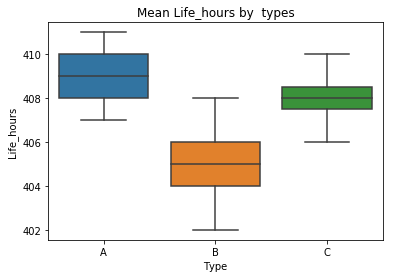

In [18]:
sns.boxplot(x = "Type", y = "Life_hours", data = life_type_df)
plt.title('Mean Life_hours by  types')
plt.show()

### a)  Write your inference on the group means from the above boxplots.

### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [152]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Life_hours ~ Type', data = life_type_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

          sum_sq   df    F    PR(>F)
Type        36.0  2.0  4.5  0.044194
Residual    36.0  9.0  NaN       NaN


### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

## <u>Two-way ANOVA</u>

### Example 3

Human Resources wants to determine if training time is different based on motivation level and training method. Conduct the appropriate ANOVA tests. Use α = .05 for each test (Interaction, Motivation and Training Method).

In [153]:
table1  = [['Motivation','Self_paced','Classroom','Computer'], ['High',15,10,22],['High',11,12,17],['Low',27,15,31],['Low',29,17,49]]
headers = table1.pop(0) #

df = pd.DataFrame(table1, columns=headers)
print(df)


  Motivation  Self_paced  Classroom  Computer
0       High          15         10        22
1       High          11         12        17
2        Low          27         15        31
3        Low          29         17        49


This is a two-way ANOVA with replication since the data contains values for multiple Motivation Levels.

Conduct a two-way ANOVA at $\alpha$ = 5% to test the effects of Motivaltion Level and Training methods on training time.

In [154]:
df1   = pd.DataFrame({'Motivation': df.Motivation.values, 'Method':'Self_paced','Time': df.Self_paced.values})
df2   = pd.DataFrame({'Motivation': df1.Motivation.values, 'Method':'Classroom','Time': df.Classroom.values})
df3   = pd.DataFrame({'Motivation': df1.Motivation.values, 'Method':'Computer','Time': df.Computer.values})
time_df = pd.DataFrame()

time_df = time_df.append(df1) 
time_df = time_df.append(df2) 
time_df = time_df.append(df3) 
pd.DataFrame(time_df)

,Method,Motivation,Time
0,Self_paced,High,15
1,Self_paced,High,11
2,Self_paced,Low,27
3,Self_paced,Low,29
0,Classroom,High,10
1,Classroom,High,12
2,Classroom,Low,15
3,Classroom,Low,17
0,Computer,High,22
1,Computer,High,17


### Step 1: State the null and alternative hypothesis:

The null hypotheses for each of the sets are given below. 

* 1) The population means of the first factor (Motivation) are equal. 
* 2) The population means of the second factor (Method) are equal. 
* 3) There is no interaction between the two factors - Motivation and Method.

Alternative Hypothesis:

* 1) The population means of the first factor (Motivation) are not equal. 
* 2) The population means of the second factor (Method) are not equal. 
* 3) There is an interaction between the two factors - Motivation and Method.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

##### Here we have two groups and two factors. There are two independent variables, Motivation and Method. 

##### Two-way ANOVA determines how a response (Training Time) is affected by two factors, Motivation and Method. 

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [157]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'Time ~ C(Motivation) + C(Method) + C(Motivation):C(Method)'
model = ols(formula, time_df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                         sum_sq   df          F    PR(>F)
C(Motivation)            546.75  1.0  17.403183  0.005867
C(Method)                531.50  2.0   8.458886  0.017945
C(Motivation):C(Method)  123.50  2.0   1.965517  0.220531
Residual                 188.50  6.0        NaN       NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, 
* p value for Motivation  is 0.005867 and < 0.05 so we reject the null hypothesis (1) and conclude that the motivation level is having an effect on Training time.
* p value for Method  is 0.017945 and < 0.05 so we reject the null hypothesis (2) and conclude that the training method is having an effect on Training time.
* p value for interaction (Motivation:Method)  is 0.220531 and > 0.05 so we retain the null hypothesis (3) and conclude that the interaction (Motivation:Method) is not having an effect on Training time.

#### We conclude that Motivation Level as well as Training methods have some effect on Training time but there is no interaction effect of both on Training Time.

##  In class lab : Practice Exercise 2

### Try example 4 with the following values:

In [158]:
table2  = [['Motivation','Self_paced','Classroom','Computer'], ['High',10,12,23],['High',9,11,17],['High',12,15,19],['Low',25,13,28],['Low',24,14,39],['Low',24,27,43]]

## Chi Square

### Properties of Chi Square distribution

##### 1. As the degrees of freedom increases, the probability density function of a chi-square distribution approaches normal distribution.
##### 2. Chi-square goodness of fit is one of the popular tests for checking whether a data follows a specific probability distribution.
##### 3. Chi square test is a right tailed test.

### Chi-square Goodness of fit tests

Goodness of fit tests are hypothesis tests that are used for comparing the observed distribution pf data with expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and a theoretical distribution (for example, normal, exponential, etc.) based on the comparison of observed frequencies in the data and the expected frequencies if the data follows a specified theoretical distribution.

| Hypothesis | Description                                                           |
| ----------- | -------------------------------------------------------------------- |
| Null hypothesis | There is no statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |
| Alternative hypothesis | There is statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |


### Chi-square Goodness of fit tests

Chi-square statistic for goodness of fit is given by 

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

This test is invalid when the observed or expected frequencies in each category are too small. A typical rule is that all of the observed and expected frequencies should be at least 5.

###  Example 5

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 30% of their passengers prefer vegan food, 45% prefer vegetarian food , 20% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|  Food type |Number of passengers|
| ---------- | ------------------ | 
| Vegan | 190 |
| Vegetarian | 185 |
| Non-Vegetarian | 90 |
| Jain | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: Meal preference is as per the perceived ratios of the operations manager
                        
Alternative hypothesis: $H_A$: Meal preference is different from the perceived ratios of the operations manager

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

Since we have observed frequencies of meal preference and we can calculate the expected frequencies, we can use chi-square goodness of fit for this problem.

### Step 4: Calculate p value or chi-square statistic value

Use the scipy.stats.chisquare function to compute Chi square goodness of fit by giving the observed values and expected values as input.

The first value in the returned tuple is the χ2 value itself, while the second value is the p-value computed using 
ν = k−1 where k is the number of values in each array.

We can calculate the expected frquency as follows:
1. Compute the total number of passengers. It will be 500.
2. We expect 30% of them prefer Vegan food, so the expected frequency for Vegan Food is = 0.3 * 500 = 150
3. Similarly we can calculate the expected frequencies of the rest of them.

In [159]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([190, 185, 90, 35])
n                  = observed_values.sum()

expected_values    = scipy.array([n*0.3, n*.45, n*0.2, n*0.05])

chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)

print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))

At 5 % level of significance, the p-value is 0.0000449


### Step 5: Decide to reject or accept null hypothesis

### In this example, p value is 0.0000449 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that Meal preference is not defined in the null hypothesis.

## In class lab : Practice Exercise 3

Refer to the above example 5. Here the operations manager changes his belief and now believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Chi-square tests of independence

Chi-square test of independence is a hypothesis test in which we test whether two or more groups are statistically independent or not.

| Hypothesis | Description |
| --------------------- | ----------------------- |
| Null Hypothesis | Two or more groups are independent |
| Alternative Hypothesis | Two or more groups are dependent |

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

The corresponding degrees of freedom is (r - 1) * ( c  - 1) , where r is the number of rows and c is the number of columns in the contingency table. 

scipy.stats.chi2_contingency is the Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence.

### Example 5 - Self-managed work teams

In [160]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

team_array = np.array([[108, 46, 71],[18, 12, 30],[35,14,26],[24,7,9]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(team_array)

print('Chi-square statistic %3.5f, P value %1.6f,  Degrees of freedom %d' %(chi_sq_Stat, p_value, deg_freedom))

Chi-square statistic 11.89531, P value 0.064346,  Degrees of freedom 6


### In this example, p value is 0.064346 which is > 0.05 so we are failed to reject the null hypothesis. 
### So, we conclude that at the 0.05 level of significance, there is no evidence of relationship between attitude toward self-managed work teams and type of job. They are independent

### Example 6 

The table below contains the number of perfect, satisfactory and defective products are manufactured by both male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among genders (Male and Female)?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: There is no difference in quality of the products manufactured by male and female
                        
Alternative hypothesis: $H_A$: There is a significant difference in quality of the products manufactured by male and female

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

We use the chi-square test of independence to find out the difference of categorical variables 

### Step 4: Calculate p value or chi-square statistic value

In [161]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

quality_array = np.array([[138, 83, 64],[64, 67, 84]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 22.15247 P value 0.000015 Degrees of freedom 2


### Step 5: Decide to reject or accept null hypothesis

### In this example, p value is 0.000015 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that there is a significant difference in quality of the products manufactured by male and female.

##  In class lab : Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [162]:
import numpy       as np
import scipy.stats as stats

churn_array = np.array([[15,142],[24, 400],[30, 389]])

### Take Home Exercises

### Home Work 1

Let's go ahead and do an example problem. Say you are at a casino and are in charge of monitoring a craps(a dice game where two dice are rolled). You are suspcious that a player may have switched out the casino's dice for their own. How do we use the Chi-Square test to check whether or not this player is cheating(at 0.05 level of significance)?

You will need some observations in order to begin. You begin to keep track of this player's roll outcomes.You record the next 500 rolls taking note of the sum of the dice roll result and the number of times it occurs.

You record the following:

<table>
    <td>Sum of Dice Roll</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
    <td>9</td>
    <td>10</td>
    <td>11</td>
    <td>12</td>
    <tr>
    <td>Number of Times Observed</td>
    <td>8</td>
    <td>32</td>
    <td>48</td>
    <td>59</td>
    <td>67</td>
    <td>84</td>
    <td>76</td>
    <td>57</td>
    <td>34</td>
    <td>28</td>
    <td>7</td>
    </tr>
    </table>
    

### Home Work 2

** The following table shows the quantity of soaps sold at different locations of different brands collected over 20 days.**

In [33]:
table1  = [['Loc','Brand X','Brand Y','Brand Z'], [ 1, 20, 28, 32], [ 2, 20, 19, 20],
  [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],[ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],
  [ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],[ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],
  [ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],[ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],
  [ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],[ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],
  [ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],[ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],
  [ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],[ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],
  [ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],[ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],
  [ 1, 21, 27, 33 ],[2, 23, 22, 25 ],[ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],
  [ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],[ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],
  [ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]]

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1.head())

   Loc  Brand X  Brand Y  Brand Z
0    1       20       28       32
1    2       20       19       20
2    1       16       23       29
3    2       21       27       31
4    1       24       25       28


This is a two-way ANOVA with replication since the data contains values for multiple locations.

Conduct a two-way ANOVA at $\alpha$ = 5% to test the effects of Brands and location on sales.

### Home Work 3

** Blood group of patients of the hospital is given below:**

| Blood group | Count |
| ------ | --- |
| O | 44%|
| A | 45% |
| B | 8% |
| AB | 3% |


Observed frequency

| Blood group | Count |
| ----- | ----|
| O | 67 |
| A | 83 |
| B | 29 |
| C | 8 |

At 5% level of significance do you have evidence to conclude that there are differences in the distribution of blood groups among patients that is expected as per our prior knowledge.



### Home Work 4

** The shift quality data is given below:**

| Shift | Perfect | Satisfactory | Defective |
| ---- | ----- | ----- | ----- |
| I | 106 | 124 | 1 | 
|II |  67 | 85 | 1 |
| III | 37 | 72 | 3 |

At 5% level of significance do you have evidence to conclude that there are differences in quality among the three shifts?


## E N D  